<a href="https://colab.research.google.com/github/michelucci/aadl2-code/blob/master/chapter3/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [0]:


from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#from tensorflow import keras
import keras.backend as K
from keras.optimizers import adam
from keras.callbacks import Callback

from keras.utils import np_utils
from keras.datasets import cifar10
import numpy as np

import matplotlib.pyplot as plt

from keras import backend as K
K.set_image_dim_ordering('tf')

# if using google colab
from google.colab import files

In [0]:
import matplotlib as mpl
mpl.style.use('classic')

## Model

In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [0]:
nClasses = 10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

In [7]:
x_train.shape[1:]

(32, 32, 3)

In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [9]:
K.clear_session()
model = createModel()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
AdamOpt = adam(lr=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [12]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


In [0]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 5 == 0):
          print ("Just finished epoch", epoch)
          print ('Loss evaluated on the validation dataset =',logs.get('val_loss'))
          print ('Accuracy reached train is', logs.get('acc'))
          print ('Accuracy reached Val   is', logs.get('val_acc'))
          return

In [16]:
batch_size = 256
epochs = 50

CC = CustomCallback()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, 
                   validation_data=(x_test, y_test),
          callbacks = [CC])

Instructions for updating:
Use tf.cast instead.
Just finished epoch 0
Loss evaluated on the validation dataset = 1.44611884098053
Accuracy reached train is 0.3375599999809265
Accuracy reached Val   is 0.468
Just finished epoch 5
Loss evaluated on the validation dataset = 0.7822032096862793
Accuracy reached train is 0.693299999961853
Accuracy reached Val   is 0.7293
Just finished epoch 10
Loss evaluated on the validation dataset = 0.6438007875442505
Accuracy reached train is 0.764460000038147
Accuracy reached Val   is 0.7769
Just finished epoch 15
Loss evaluated on the validation dataset = 0.6248113805770874
Accuracy reached train is 0.8024000000381469
Accuracy reached Val   is 0.792
Just finished epoch 20
Loss evaluated on the validation dataset = 0.5565085322380066
Accuracy reached train is 0.8218200000190735
Accuracy reached Val   is 0.8167
Just finished epoch 25
Loss evaluated on the validation dataset = 0.532983881187439
Accuracy reached train is 0.8364600000190735
Accuracy reached

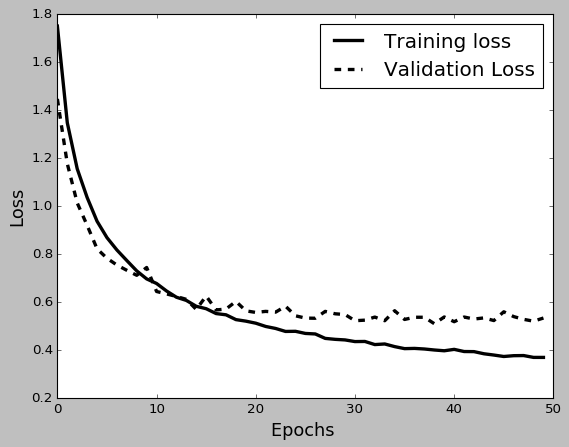

In [30]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

plt.savefig('ch3-michelucci-figxx1.png', bbox_inches='tight', dpi = 300)
files.download('ch3-michelucci-figxx1.png')

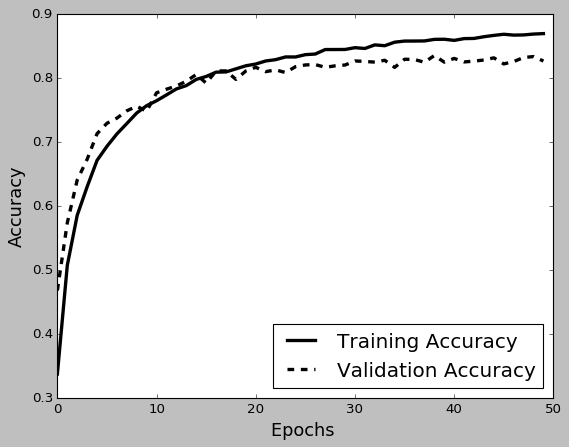

In [31]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

plt.savefig('ch3-michelucci-figxx2.png', bbox_inches='tight', dpi = 300)
files.download('ch3-michelucci-figxx2.png')